### Quadratic and higher order equation tree representation along with finding its derivative
### The program has been created by me, Andriei Gensh, student of Cracow University of Technology on 10.12.2020
### Note: 
 - The program supports all basic operators (+, -, *, /) and their different combinations, however it does not support finding derivative of a/x and similar function due to its complexity. After all, the point was to create a viable representation of QUADRATIC equation only, not every math function.
 - Due to the fact, that it is really hard to describe my way of thinking with words only, this notebook contains pictures, illustrations as well as functions descriptions that should help you understand the main algorithm, that is used in this program. 

# 1. Introduction to the main idea
When working with formulas and equations we need to find a suitable and more or less simple way to represent it in a tree-like shape. There are numerous different ways of accomplishing it *(including OOP approach)*, however i opted for a classic python list-dictionary representation that worked fine so far.
By no means this approach of mine is the most optimal, but as I stated before, it works.


#### Operators and operands
Different operators, such as +, -, /, * have different priorities *(in program described as either "priority" or "operator strength")*, wheres operands are just symbol, that have no properties whatsoever. They either belong to the operator or not. 
With all that in mind, here is how operators and operands are represented in this program:

 - Operators: Every operator is a dictionary that consists of thre fields (keys): 
      * parent: defines the index of a parent operator in the tree hierarchy. Can be either positive integer including 0, or -1, which indicates, that the operator is the root of the tree and has no parent
      * value: defines what kind of operator it is. Can be one of the following +, -, /, *.
      * coverage: defines the coverage of the operator. This field is probably the most complicated one to describe, but it will be clarified later on with the help of some examples. Long story short, this field defines how many other elements of the tree that appear after this operator (both other operators as well as operands) are its children.
 - Operands: Every operand is merely a symbol (char or speaking in terms of python str string). It has no properties at all. The easiest part of the program so far )
 
#### A simple example
A formula like a\*b can be represented using the above described operands and operators as following (don\`t mind the order for now if it is not clear to you )  : \[ {"parent" : -1, "value" : "*", "coverage" : 2}, "a", "b" \].  
This basically tells us, that there is a tree with operator "*" as a root (because its "parent" = -1) and "coverage" = 2, which means, that the next two elements in this tree are either his direct operands or hie children.
#### A more sophisticated example
Consider the following formula: a\*b+c/d  
Lets build it tree together step by step!   
1. First thing we encounter is "a". It is a symbol, not an operator and our tree is so far empty (there is no **active operator**). What we need to do is just append this symbol to the empty tree (we dont have any other options). So now the tree looks like **\["a"\].**  
2. Next thing we encounter is "\*". It is an operator and we dont have any **active operators yet**. What we need to do is add this new operand as a root of the tree (every tree needs a root) and make it **active**. We also know that every time an operator occurs there is definitely a free operand, that does not belong to any operator yet (prove me wrong), so when adding an operator we can automatically set its "coverage" to 1.   
Now our tree looks like this : **\["{"parent" : -1, "value" : "*", "coverage" : 1}, "a"\]**
3. Next thing we see is "b". It is an operand and we already have an **active operator** (root). What we need to do is to add this new operand at the end of the active operator\`s "coverage" (which basically means adding this new operand right after the last operand of the active operator) and increase the "coverage" parameter by 1.  
As the result, our tree looks like that **\["{"parent" : -1, "value" : "*", "coverage" : 2}, "a", "b"\]**
4. Next thing we see is an operator "+". We already have an active operator, so we dont need to add this one as a root. However this new operator has lower priority that the active one (+ is "weaker" than "\*"). we cant add it at the end of the active operator\`s coverage like we did with "b" operand because then it would mean, that we make "+" an operand of "\*" == we want to multiply a, b and the eventual sum of some other operands. What we actually mean to do, it to sum together the product of a and b and the quotient of c and d. **That means, we need to make the multiplication operator a child of an addition operator and then make it an active operator for the future purposes**. We achieve this by simply adding "+" operator as root of our tree and **setting its "coverage" filed to the coverage value of its child operator + 1**. This does actually make sense. If we just set the operator "+" as a root and set it "coverage" = 1, that would mean, that it covers the operator "\*", which you may think is fine. But when we will need to add one more operand to the "+" operator (and we always do it by adding this operand at the end of the an active operand\`s coverage), we will indirectly add an operand to the "\*" operator, thus mess up the whole logic of the program.  
Long story short, now the tree looks like that : **\[{"parent" : -1, "value" : "+", "coverage" : 3},{"parent" : 0, "value" : "*", "coverage" : 2} "a", "b"\]**  
Notice, that the former root operator "\*" now has his "parent" field set to 1. **When we add something new to the tree structure, we need to update the other operators that occur AFTER the newly added element by increasing their\`s parent field value by one**  This too makes sense, since adding a new element causes shift in indexes that we need to be able to "fix".
5. Next thing we see is "c". This is an operand, so we simply add it at the end of the active operator "coverage" range and increase the "coverage" value by 1.  
Now our tree looks like this : **\[{"parent" : -1, "value" : "+", "coverage" : 4},{"parent" : 0, "value" : "*", "coverage" : 2} "a", "b", "c"\]**  
Notice, that "+" operator as a root always covers all tree element. In the same time the "\*" operator covers only two of them, that is "a" and "b", which is perfectly right (we multiply only a and b).  
** You may think of the COVERAGE of an operator this way : The COVERAGE of an operator shows, that the THE RESULT OF COVERED CHILD OPERATORS will be its INDIRECT OPERAND, while THE OPERANDS IN COVERAGE RAGE THAT ARE NOT COVERED BY OTHER OPERATORS will be its DIRECT OPERANDS**
6. Next we see "/". This is an operator that is also stronger (has higher priority) as the active one. We dont want to make this operator parent of the active operator (obviously ???). What we want to do is to apply this operator to the last operand of the active operator, that being "c" operand. That means, we make this new operator a **child** of an active operator. We do that by simply adding this operator **in front** of the last operand of the active operator, set its "coverage" = 1 and increase the coverage of an active operator by 1 as well. After that we mark the new operator as an active one for the future purposes.  
Now the tree looks like that : **\[{"parent" : -1, "value" : "+", "coverage" : 5},{"parent" : 0, "value" : "*", "coverage" : 2} "a", "b", {"parent" : 0, "value" : "/", "coverage" : 1}, "c"\]**  
I hope now you get the logic behind building the tree representation. I would suggest, that you decide what to do with the last operand by ourself. Try to make it purely relying on the intuition and logic.  

Hint: the final result should look like that : **\[{"parent" : -1, "value" : "+", "coverage" : 6},{"parent" : 0, "value" : "*", "coverage" : 2} "a", "b", {"parent" : 0, "value" : "/", "coverage" : 2}, "c", "d"\]**   
 Notice thought, that now the "coverage" of the root operator "+" is not 5 but 6. It is because ** Every time we add a new element to the tree we need to also update the "coverage" filed value of the parents of operator we add element to ** .That actually makes sense to, if you think about it. A parent should ** ALWAYS** cover all its children alongside with their operands, thus when we add a new element to the child operator (regardless if it is an operand or a new operataor) ne need to update its parent coverage. 
 ** HOWEVER ** some of you might have noticed, that after modifying the operators parent\`s "coverage" we need to do the same to its parent (active operator\`s grandparent) too. That leads us to the rule:   
 ** WHENEVER WE MODIFY THE OPERATOR\`S COVERAGE VALUE, WE MUST MODIFY THE SAME FIELD VALUES OF THIS OPERATOR\`S PARENT, GRANDPARENT, GRANDGRANDPARENT AND SO ON**. This makes sense as well.

### To sum up everything that has been said and written so far, there are the main rules, by which the program works: 
* ##### Every tree needs a root
* ##### Every operator needs its operands (more than one, unless it is a "minus" operator)
* ##### Every operand needs its operator (no more than one). 
* ##### The operands may be covered by many other operators, but they really belong to one operator only : the one that goes before these operands and thus covers them first.
* ##### An operator can only be a parent to the operators of the same ore greater priority (strength),not the other way around.
* ##### After adding a new element to the tree be sure to update the "parent" fields of all the operators that go AFTER this new element index-wise
* ##### After adding a new element to the tree be sure to update the "coverage" filed values of all ANCESTORS of the active operator, and ANCESTORS only.

### With that all covered and settled, lets dive in the code explanation section

# 2. Code section
Below you will find the code pieces, that implement the logic of the project

### This function updates operators, that occur after the element of the given tree with the given index and are not it brothers, or brothers of it parent, or brothers of its parent parent ...
##### Argument:  
 * index - the new element\`s index, after which we need to update
 * parent_index / the index of the element\`s parent
 * tree - the tree we are working with
 * amount - defines the number that we need to either add or subtract from the "parent" fields value

In [6]:
def update_all_operators_after_this_index(index, parent_index, tree, amount):
    ancestors = []
    ancestors.append(index) #!!!???
    parent_index_copy = parent_index
    while parent_index_copy != -1:
        ancestors.append(parent_index_copy)
        parent_index_copy = tree[parent_index_copy]["parent"]
        if parent_index_copy == -1:
            break
    control_index = index + 1
    while control_index < len(tree):
        tree_element = tree[control_index]
        if isinstance(tree_element, dict):
            #if this is an operator - then update it
            if tree_element["parent"] in ancestors:
                control_index += 1
                continue
            else:
                tree_element["parent"] = tree_element["parent"] + amount
            control_index += 1
        else:
            control_index += 1

### This function updates ancestors of the operator with the given index in a given tree 
 * index - the new element\`s index, after which we need to update
 * tree - the tree we are working with
 * amount - defines the number that we need to either add or substract from the "parent" fields value

In [7]:
def update_all_operators_before_this_index(index, tree, amount):
    control_index = index
    parent = tree[index]["parent"]
    # ancestors list
    parents = []
    # append the first ancestor
    parents.append(parent)
    while control_index >= 0:
        tree_element = tree[control_index]
        if isinstance(tree_element, dict):
            # if it is an operator
            if control_index in parents:
                # and it is an ancesstor of the given operator then update
                tree_element["coverage"] = tree_element["coverage"] + amount
                parents.append(tree_element["parent"])
            control_index -= 1
        else:
            control_index -= 1

### This function allows to check if the given operator has another operator as a child.
Now this requires a litle bit of explanation. Consider the following example formula: ** a-b+c-d**  
As we progress in building the tree for this equation, at some point of time we will have it look like this :  
** \[{"parent" : -1, "value" : "+", "coverage" : 4} , {"parent" : 0, "value" : "-", "coverage" : 2}, "a", "b", "c"\] **  
The next thing we would like to add to the tree at this point would be operator "-". It would seem logical to set it as a root and make it parent for operator "+", but it is not. You can see, that "+" already has "-" as its child and both "+" and  "-" have the same priority. So instead of creating another root and thus complicating the structure of the tree, we need to check if a currently active operator has among its children the exact same operator that we want to add. If so, all we need to do is make this child operator active. If not, then we indeed need to add another root to the tree.  
The function below checks the children of the given perator in order to find child_value equivalent. If it finds one - it returns its index. Otherwise it returns 0.

In [8]:
def check_my_children(tree, parent_index, child_value):
    for i in range(parent_index+1, parent_index + tree[parent_index]["coverage"]):
        if isinstance(tree[i], dict):
            if tree[i]["parent"] == parent_index:
                if tree[i]["value"] == child_value:
                    return i
                else:
                    continue
            else:
                continue
    return 0

### This function compares two given operators values and decides which one has a higher priority. It ALWAYS compares the first one ith the second one and returns the result for thr FIRST one. 

In [9]:
def compare_operators(operator_alpha, operator_betha):
    first_op_priority = None
    second_op_priority = None
    
    if (operator_alpha == "-" or operator_alpha == "+"):
        first_op_priority = 0
    else:
        first_op_priority = 1
    
    if (operator_betha == "-" or operator_betha == "+"):
        second_op_priority = 0
    else:
        second_op_priority = 1
        
    if first_op_priority == second_op_priority:
        return -1
    elif first_op_priority > second_op_priority:
        return True
    else:
        return False
        

### Core function. Builds the tree representation of the given formula.

In [12]:
def create_tree_representation(formula):
    tree = [];
    root_index = None
    semiroot_indexes = []
    ghost_operator_indexes  = []
    active_operator = -1
    iterator = 0
    operators = ["+", "-", "*", "/", "(", ")"]
    
    while(iterator < len(formula)):
        
        symbol = formula[iterator]
        
        if symbol in operators:
            offset_for_repeated_iteration = 0
            while(True):
                if symbol == "(":
                    # we are dealing with parenthesis, so we need to create a subtree for the current tree
                    if active_operator == -1:
                        tree = tree[:0] + [{"parent" : active_operator, "value" : None, "coverage" : 0}] + tree[0:]
                        active_operator = 0
                        # update ???
                    else:
                        tree = tree[:tree[active_operator]["coverage"] + active_operator + 1] + [{"parent" : active_operator, "value" : None, "coverage" : 0}] + \
                        tree[(tree[active_operator]["coverage"] + active_operator + 1):]
                        active_operator = tree[active_operator]["coverage"] + 1 + active_operator
                        update_all_operators_after_this_index(active_operator, tree[active_operator]["parent"], tree, 1)
                        update_all_operators_before_this_index(active_operator, tree, 1)
                    ghost_operator_indexes.append(active_operator)
                    break
                elif symbol == ")":
                    # this means that there was nothing in parenthesis or that there was only one operand
                    # in such case we just delete these parenthesis
                    my_parent = tree[ghost_operator_indexes[len(ghost_operator_indexes) - 1]]["parent"]
                    if tree[active_operator]["coverage"] <= 1 or tree[active_operator]["value"] is None:
                        update_all_operators_after_this_index(active_operator, tree[active_operator]["parent"], tree, -1)
                        update_all_operators_before_this_index(active_operator, tree, -1)
                        del(tree[active_operator])
                        
                    active_operator = my_parent
                    del(ghost_operator_indexes[len(ghost_operator_indexes) - 1])
                    break
                    
                if isinstance(tree[active_operator], dict):
                    if tree[active_operator]["value"] is None:
                        tree[active_operator]["value"] = symbol
                        break
                else:
                    pass
                    
                if active_operator == -1:
                    # it means we are either at the root of the newly created empty tree (if case)
                    if len(tree) == 0 :
                        #the tree is empty and the operator we are adding has no operand so far
                        tree = tree[:0] + [{"parent" : -1, "value" : symbol, "coverage" : 0}] + tree[0:]
                    elif len(tree) == 1:
                        #the tree is not empty and there is one operand for the upcomming operator
                        tree = tree[:0] + [{"parent" : -1, "value" : symbol, "coverage" : 1}] + tree[0:]
                        active_operator = 0
                        update_all_operators_after_this_index(active_operator, tree[active_operator]["parent"], tree, 1)
                        update_all_operators_before_this_index(active_operator, tree, 1)
                        break

                    # or we are adding another operator as a root before the actual root (else case)
                    else:
                        tree = tree[:0] + [{"parent" : -1, "value" : symbol, "coverage" : 1}] + tree[0:]
                        tree[0]["coverage"] = tree[0]["coverage"] + tree[1]["coverage"]
                        active_operator = 0
                        update_all_operators_after_this_index(active_operator, tree[active_operator]["parent"], tree, 1)
                        update_all_operators_before_this_index(active_operator, tree, 1)
                        break
                    
                else:
                    # it means the root already exists, the tree is no  longer empty
                    # now we need to decide, whether or not the operator we are about to add 
                    # should go up the hierarchy or down, which strongly depends on the the operator priority
                    active_operator_value = tree[active_operator]["value"]
                    evaluation = compare_operators(symbol, active_operator_value)

                    if evaluation == True:
                        # the operator we want to add is stronger then the active operator, so 
                        # we apply it to the last active operator`s operand, thus it goes down 
                        # the hierarchy
                        iteration_index = active_operator + 1
                        last_child_is_an_operator = False
                        end_iteration_point = tree[active_operator]["coverage"] + active_operator
                        while iteration_index <= end_iteration_point:
                            if isinstance(tree[iteration_index], dict):
                                if iteration_index + tree[iteration_index]["coverage"] == end_iteration_point:
                                    last_child_is_an_operator = iteration_index
                                    break
                                else:
                                    iteration_index += tree[iteration_index]["coverage"] + 1
                            else:
                                iteration_index += 1
                        
                        if last_child_is_an_operator:
                            tree = tree[:(tree[active_operator]["coverage"] - tree[last_child_is_an_operator]["coverage"] + active_operator)] + \
                            [{"parent" : active_operator, "value" : symbol, "coverage" : 1 + tree[last_child_is_an_operator]["coverage"]}] + \
                            tree[(tree[active_operator]["coverage"] - tree[last_child_is_an_operator]["coverage"] + active_operator):]
                            
                            active_operator = tree[active_operator]["coverage"] + 1 + active_operator - tree[last_child_is_an_operator]["coverage"]
                            tree[active_operator + 1]["parent"] = active_operator 
                        else:
                            tree = tree[:(tree[active_operator]["coverage"] - offset_for_repeated_iteration + active_operator)] + \
                            [{"parent" : active_operator, "value" : symbol, "coverage" : 1 + offset_for_repeated_iteration}] + \
                            tree[(tree[active_operator]["coverage"] - offset_for_repeated_iteration + active_operator):]
                        
                            active_operator = active_operator + tree[active_operator]["coverage"] - offset_for_repeated_iteration
                        
                        update_all_operators_after_this_index(active_operator, tree[active_operator]["parent"], tree, 1)
                        update_all_operators_before_this_index(active_operator, tree, 1)
                        break

                    elif evaluation == False:
                        # the operator is weaker and it must go up, but there could be some complications
                        # but basicaly all we need to do is make the parent of an active operator active and 
                        # let the loop handle the rest of the logic for us
                        if offset_for_repeated_iteration != 0:
                            tree = tree[:(tree[active_operator]["coverage"] - offset_for_repeated_iteration + active_operator)] + \
                            [{"parent" : active_operator, "value" : symbol, "coverage" : 1 + offset_for_repeated_iteration}] + \
                            tree[(tree[active_operator]["coverage"] - offset_for_repeated_iteration + active_operator):]
                            
                            active_operator = active_operator + tree[active_operator]["coverage"] - offset_for_repeated_iteration
                            update_all_operators_after_this_index(active_operator, tree[active_operator]["parent"], tree, 1)
                            update_all_operators_before_this_index(active_operator, tree, 1)
                            break
                        else:
                            if active_operator in ghost_operator_indexes:
                                tree = tree[:active_operator] + \
                                [{"parent" : tree[active_operator]["parent"], "value" : symbol, "coverage" : 1 + tree[active_operator]["coverage"]}] + \
                                tree[active_operator:]
                                
                                tree[active_operator + 1]["parent"] = active_operator
                                
                                update_all_operators_after_this_index(active_operator, tree[active_operator]["parent"], tree, 1)
                                update_all_operators_before_this_index(active_operator, tree, 1)
                                break
                            else:
                                active_operator = tree[active_operator]["parent"]
                                continue

                    else:
                        # the active operator and the operator we want to add are equally powerful,
                        # thus we need to decide, wheather or not it still needs to go up, or this operator
                        # could potentially be among the childeren of the active operator. in this case 
                        # we only need to make this child operator active. Otherwise, the operator goes up
                        if active_operator_value == symbol:
                            #the operator we want ot add is exactly the same operator, that is currently active
                            # so we just skip
                            break
                        else:
                            # the operator is different from its active "brother", thus we need to start cheking its children
                            possible_child_position = check_my_children(tree, active_operator, symbol)
                            
                            if possible_child_position == 0:
                                # there is no equal operator among the childern of the active one.
                                # Thus we start searching up the tree hierarchy starting with the 
                                # active operator`s parent
                                # It is most likely, that the active operator will become the operand 
                                # for the new operator, so in order to make this right, we should 
                                # define the offset variable, that will tell where exactly to place this
                                # new operator and what coverage it must have.
                                offset_for_repeated_iteration = tree[active_operator]["coverage"]
                                active_operator = tree[active_operator]["parent"]  
                                continue
                            else:
                                # we have foud the child that is equal to the operator we need to add,
                                # thus we should stop an make this child operator the active one
                                active_operator = possible_child_position
                                break
            
        else:
            # it means we are working with either an "x" or with a number (constant)
            if symbol in ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "."]:
                #if the symbol value is equal to one of the following values then we definitely are 
                # dealing with a number. However it might or might not be a one digit number. It could also 
                # be less then 1.0 , which is why we included dot symbol in the range above.
                # The while loop allows us to read the whole number and then treat it as a regular symbol.
                new_index = iterator + 1
                while new_index < len(formula):
                    if formula[new_index] in ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "."]:
                        # if the next char we read from formula is one of the following chars, 
                        # then append it to the symbol value, increase the value of the main iterator 
                        # so that we dont read the same number twice in the future and continue checking 
                        symbol += formula[new_index]
                        iterator += 1
                        new_index += 1
                    else:
                        # otherwise it means that we are done with reading one number digits 
                        # and we may go on 
                        break
            if active_operator != -1:
                # if there is an active root in the tree then we need to append the new symbol ("x" or a constant) 
                # at the end of the operators coverage and increase its value by one.
                this_operator = tree[active_operator]
                
                tree = tree[:(active_operator + this_operator["coverage"] + 1)] + [symbol] + \
                            tree[(active_operator + this_operator["coverage"] + 1):]
                
                this_operator["coverage"] += 1
                update_all_operators_after_this_index(active_operator + this_operator["coverage"] + 1, active_operator, tree, 1)
                update_all_operators_before_this_index(active_operator, tree, 1)
            else:
                # else we just append the symbol at the end of the tree
                tree.append(symbol)
        # increment the value of the iterator so that we may get a new symbol from the formula
        # and proceed
        iterator += 1
    return tree


formula = "(a+b*c-d/e-f)/(g+(h/i)*t-(j+v))"
print(recreate_formula(create_tree_representation(formula), 0)[1])

#draw_graph_representation(formula)


(a+b*c-d/e-f)/(g+h/i*t-j+v)


# 3. Finding the derivative of the given polynomial
The process of finding the derivative of the function can be complicated, but for a polynomial it is fairly simple.  

## 3.1 Main derivative idea

When dealing with plynomial all we need to do is pay attention to the operators priorities and whether or not this operators have "x" as their operands. There is a strategy for every operator:  
 * ** Operator "+" ** : If its operands are constant numbers all we need to do it turn them into delete them from the tree and decrement the value of the operator\`s coverage by one. However if "+" operator is used to sum up some products of constant numbers and "x" variables, then we firstly need to deal with these products and then proceed. If the operand of "+" is "x" - replace it by "1". if the operand of "+" is something like a\*x\*x\*x... - allow the operator "\*" handle it, wait for the result of such handling and then do nothing more about it.
 * ** Operator "-" ** : the strategy is equal to the one that is used for "+" operator case.
 * ** Operator "\*" ** : as we now know, the stronger operator cannot have a weaker operator as its child, thus we have no need to check if the operands of the "\*" operator could be "+" or "-". We also know for sure that operator "/" cant be its operand as well (because division is not used in standard polynomoals of the following shape a+b*x+c*x*x+...). So we can simply loop through the operands of the "\*" operator and do the following: count the amount of "x" operands  and memorize the position of the first such "x" operand. IF the amount of "x" operands == 0 - this means we were dealing with the multiplication of constant numbers only, thus the derivative of such product == 0 and all we need to do is delete every operand of tour operator and delete the operator itself for there is no more use of it anymore. If the amount of "x" operands == 1  - replace it with 1. If the amount of "x" variables > 1  - replace the first such "x" with the overall amount of these "x" operands - 1.
 * ** Operator "/" ** : htis operator is sumply not supported by tmy program. The reason has ale=ready been described.  
 
## 3.2 Rules we need to follow  
 * When a child operator deletes one of its operands - we need to count down how many operand were deleted exactly and then subtract that amount from the parents operators\` "coverage" value which is (i hope) obvious and makes sense.
 * If the "coverage" value of an operator reaches "0" then this means that this operator is no longer needed in the tree, thus we delete it and decrease the "coverage" of its parents operators by another 1 (also makes sense).
 * When we delete an operand or an operator, we need to shift all "parent" values of the operators, that go after the current operator and are not its brothers, or bothers of its parent, or brothers of its parent parent and so on. That one is complicated to understand, however it does make sense if you think about it. When we delete, lets say, an operand of an operator, it does not affect the validity of "parent" values of other "brotherly" operators (operators with the same parent as the operator which operand we are deleting). However it will affect the children of these operators, because the deletion caused a shift in indexes in the whole tree. It will also affect all other operators, that are "brothers" to the current operator\`s parent, and also those who are brothers to the current operators\` parent parent ... and so on. it is actually easier to understand if you look at the tree representation written as a list of operands and operators (the representation that create_tree_representation() function creates), cross out a random operand and see for your self which "parent" values of which operators will still be valid, and which will not. 

 

## Derivative function
* formula / a polynomial written as a string
* der_level - which level derivative do you what to have

In [13]:
def der_function(formula, der_level, variables):
    # create the tree representation of the given formula
    tree_representation = create_tree_representation(formula)
    # if it is a single symbol then check >
    if len(tree_representation) == 1:
        # id it is an "x"  - return "1"
        if tree_representation == ["x"]:
            return "1"
        else:
            #else it is a number so return "0"
            return "0"
    
    # this is a function inner fucntion that checks if the operator 
    # is a strong one or a weak one
    def is_strong(operator_value):
        if operator_value in ["*", "/"]:
            return True
        else:
            return False
    # another inner function that does the main work.
    def inner_der(tree, starting_point, variable):
        for_the_first_time = True
        operator_strength = False
        elements_i_lost = 0
        current_operator_index = starting_point
        index = current_operator_index
        finish_point = tree[current_operator_index]["coverage"] + current_operator_index
        while index <= (finish_point):
            element = tree[index]
            if isinstance(element, dict):
                if for_the_first_time:
                    current_operator_index = index
                    for_the_first_time = False
                    operator_stgength = is_strong(tree[current_operator_index]["value"])
                    index +=1
                    continue
                else:
                    shrink = inner_der(tree, index, variable)
                    tree[current_operator_index]["coverage"] -= shrink
                    finish_point -= shrink
                    update_all_operators_after_this_index(current_operator_index, tree[current_operator_index]["parent"], tree, -shrink)
                    update_all_operators_before_this_index(current_operator_index, tree, -shrink)
                    if isinstance(tree[index], dict):
                        index = index + 1 + tree[index]["coverage"]
                    else:
                        index += 1
                    elements_i_lost += shrink
                    continue
            else:
                if operator_stgength:
                    amount_of_x_variables = 0
                    shrink = 0
                    last_x_place = -1
                    for iterator in range(current_operator_index + 1, current_operator_index + 1 \
                                          + tree[current_operator_index]["coverage"]):
                        if tree[iterator] == variable:
                            amount_of_x_variables += 1
                            last_x_place = iterator
                            
                    if amount_of_x_variables == 0:
                        j = current_operator_index + 1
                        end = current_operator_index + 1 + tree[current_operator_index]["coverage"]
                        while j < end:
                            del(tree[j])
                            shrink += 1
                            elements_i_lost += 1
                            end -= 1
                        tree[current_operator_index] = "0"
                        return elements_i_lost
                    
                    elif amount_of_x_variables == 1:
                        del(tree[last_x_place])
                        tree[current_operator_index]["coverage"] -= 1
                        shrink += 1
                        elements_i_lost += 1
                        return elements_i_lost
                    
                    else:
                        tree[last_x_place] = str(amount_of_x_variables)
                        shrink = 0
                        return elements_i_lost
                        
                else:
                    shrink = 0
                    if element == variable:
                        tree[index] = "1"
                        index += 1
                    else:
                        del(tree[index])
                        tree[current_operator_index]["coverage"] -= 1
                        shrink += 1
                        elements_i_lost += 1
                        finish_point -= 1
                        
                        if tree[current_operator_index]["coverage"] ==0:
                            tree[current_operator_index] = "0"
                            return elements_i_lost
                        else:
                            continue
                            
        return elements_i_lost
    
    for level in range(der_level):
        inner_der(tree_representation, 0, variables[der_level - level - 1])
        #optionally if d/dxdy == d/dydx:
        # inner_der(tree_representation, 0, variables[level])
        
    return recreate_formula(tree_representation, 0)[1]

## Function that recreates the string format of the formula.
* tree -  the tree representation of a formula
* starting_point / when you call upon this function set this argument to 0. It is used in the recursive calls of the function to determine, what tree element to start from

In [11]:
def recreate_formula(tree, start_point):
    if len(tree) == 0:
        return 0,"0"
    if len(tree) == 1:
        return 0, "0"
    finish_index = tree[start_point]["coverage"] + start_point
    first_time_operator = True
    current_operator = None
    current_operator_index = None
    recurcive_result = None
    formula = ""
    index = start_point
    while (index < (finish_index + 1)):
        element = tree[index]
        if isinstance(element, dict):
            if first_time_operator:
                current_operator = element["value"]
                current_operator_index = index
                first_time_operator = False
                index = index + 1
                continue
            else:
                if compare_operators(tree[current_operator_index]["value"], tree[index]["value"]) == True:
                    formula += "("
                recurcive_result = recreate_formula(tree, index)
                formula = formula + recurcive_result[1]
                
                if compare_operators(tree[current_operator_index]["value"], tree[index]["value"]) == True:
                    formula += ")"
                index = index + recurcive_result[0]
                
                if index != finish_index:
                    formula += current_operator
        else:
            formula = formula + element
            
            if index != finish_index:
                formula = formula + current_operator
        index = index + 1
    
    return tree[start_point]["coverage"], formula
        

## Libraries for plotting and saving plots as files

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.backends.backend_pdf as pdf

## The drawing function. Draws the tree of the polynom or given formula.
* formula / string representation of the polynomial ot formula

In [22]:


def draw_graph_representation(formula):
    
    #file = pdf.PdfPages('LADI_polynom_tree.pdf')
    
    #create tree representation of the formula
    tree = create_tree_representation(formula)
    # prepare figure and axis plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(formula)
    
    #recursive inner function that does the main work
    # tree - tree representation
    # tree_index - the index of the element we want to draw in the tree
    # identificator - tell if the element is an operator (1), or an operand (-1)
    #canvas_top_left - [[x1,y1], [x2,xy]] coordinates of the left top corner of the canvas
    #canvas_bottom_right - [[x1,y1], [x2,xy]] coordinates of the right bottom corner of the canvas
    #figure - plot
    
    def inner_draw(tree, tree_index, identificator, canvas_top_left, canvas_bottom_right, figure):
        #define the future position of the element we want ot drew. It should be the middle of the 
        # allowed space
        my_position = [(canvas_bottom_right[0] + canvas_top_left[0])/2.0, canvas_top_left[1]*0.95]
        connections_list = []
        if identificator == -1:
            # if we are dealing with an operand - just draw a point and return the position of this point 
            # for future use (we will need this data to draw connections between points of the tree)
            figure.scatter(my_position[0], my_position[1], s = 100, alpha = 0.1)
            figure.annotate(tree[tree_index], xy=(my_position[0], my_position[1]))
            
            return my_position, []
        else:
            # otherwise it is an operator and the fun begins
            # define the maximum hight of subcanvas for every child of this operator
            canvas_hight_per_child = canvas_top_left[1]*0.80
            
            #plot the operator in place
            figure.scatter(my_position[0], my_position[1], s = 100, alpha = 0.1, marker = 's')
            figure.annotate(tree[tree_index]["value"], xy=(my_position[0], my_position[1]))
            
            index = tree_index + 1
            # loop through it children. If it is another operator - call upon this function recursively
            # otherwise call upon this function recursively all the same, but with different arguments
            while index < (tree_index + tree[tree_index]["coverage"] + 1):
                if isinstance(tree[index], dict):
                    #it is an operator
                    # give this operator the more space on the plot the more other operators and operands it covers
                    drawing_result = inner_draw(tree, index, 1, 
                                                   [canvas_top_left[0],canvas_hight_per_child],
                                                   [canvas_top_left[0] + tree[index]["coverage"]*10, 0], figure)
                    #agjust the variables 
                    canvas_top_left[0] += tree[index]["coverage"]*10
                    # store the position of the newly drown child 
                    child_position = drawing_result[0]
                    # storethe list of connecton of the child to other elements of the tree
                    # and append it to the main list of connection between the point
                    child_connections = drawing_result[1]
                    connections_list += child_connections
                    connections_list += [[my_position, child_position]]
                    # get to the drawing of the next operator or operand, skipping the once this operator covers, 
                    # for they are deffinitrly already drawn 
                    index += tree[index]["coverage"] + 1
                else:
                    # its an operand
                    # give it minimum space
                    drawing_result = inner_draw(tree, index, -1, 
                                                [canvas_top_left[0],canvas_hight_per_child],
                                                   [canvas_top_left[0] + 10, 0], figure)
                    # adjust variables
                    canvas_top_left[0] += 10
                    child_position = drawing_result[0]
                    connections_list += [[my_position, child_position]]
                    index += 1
        # in th end return the list of connections between different point in the tree (subtree)
        return my_position, connections_list
    
    # call upon this inner function
    result = inner_draw(tree, 0, 1, [0, tree[0]["coverage"]*10], [tree[0]["coverage"]*10,0], ax)[1]
    #get the list of all connections in the tree and raw them all on one plot
    for line in result:
        ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]])
    #save the resultvto a file
    #file.savefig(fig)
    # behold the resukt yourself
    #file.close()
    plt.show()

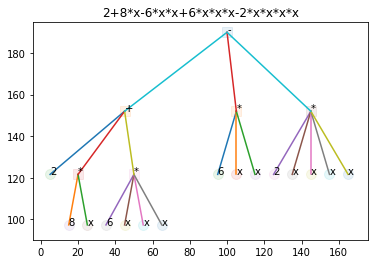

None


In [23]:
print(draw_graph_representation("2+8*x-6*x*x+6*x*x*x-2*x*x*x*x"))

test
(10, '(a+b-a-b)/(f-h)')


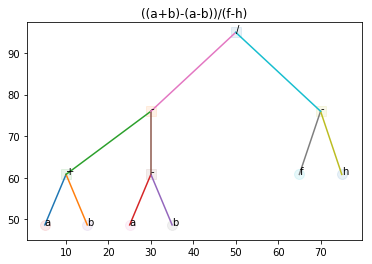

In [17]:
print("test")
formula = "((a+b)-(a-b))/(f-h)"
print(recreate_formula(create_tree_representation("((a+b)-(a-b))/(f-h)"), 0))
draw_graph_representation("((a+b)-(a-b))/(f-h)")

# 4. Finding an combined derivative
## Main Idea
In order to be able to calculate something like ** $\frac{d}{dx} + \frac{d}{dy}$ ** (sometimes also written as ** $\frac{df}{dx} + \frac{df}{dy}$ ** ) we basically need to combine together several different derivatives with respect to different variables. In order to simplify (or maybe to make things a little bit mere complicated) I\`ve came up with the following solution.
The desired combined derivative is described with a single string, that is very alike the string format we use in the create_tree_representation and other similar function, that i have described above.
This string is then parsed in order to retrieve the vital information about what kind of simple derivative we would like to combine together and with respect to which variables, also what is the order of these derivatives (in program described as "level" due to my past lack of knowledge on the subject of maths terminology). Now, lets see what kind of special string is it and how one should operate on it.

### Parsing the "rule string"
Lest call this special string "the rule string" or "the derivative rule" for simplicity sake. It is a regular string that has the following shape (format) :  
** \$respectable_variable_1,respectable_variable_2,...\$derivative_order operator \$respectable_variable_1,respectable_variable_2,...\$derivative_order ... **  
It all seems kind of scary, but it is quite simple to read actually. But first, lest see what each word in such rule string means an how it is parsed.  
The derivative "operator" as you may call it is defined as ** \$respectable_variable_1,respectable_variable_2,...\$derivative_order ** . You may argue that it does nor look like one, however in the end it is all a matter of our imagination. Why exactly this format? Well, in maths the derivative is denoted as $\frac{df}{dx}$ or $\frac{d}{dx}$, but I think, that in programming it is not the best idea to bind specific functions to letters (in our case to the letter "d") for it could get a little bit confuding in the future to decide, whether these letter mean the function or they are just some regular letters. Special symbols on the other hand are more suitable for this purpose. E.g. the "\\$" symbol means dollar, but is rarely used in programming (except for PHP of course, but we are not writing our code in PHP, are we). So, i decided to bind the derivative to this symbol.  
** Now, the "parsing" part **  
The derivative like $\frac{df}{dx}$ (a first order derivative with respect to the x variable) can be described using my format as such \\$x\\$1 The first \\$ tells us, that the following set of symbols up to the next ** \\$** describes the derivative\`s respectable variables. The second and the last one \\$ tells us, that the following number describes the order of the derivative. In other words, ** SET OF CHARACTERS IN BETWEEN TWO \\$ SYMBOLS DEFINES THE RESPECTED VARIABLES FOR THE DERIVATIVE, THE NUMBER AFTER THE LAST OF TWO \\$ DEFINES THE ORDER OF THE DERIVATIVE**. 
With all that in mind, something like df/dxdydz (first order derivative with respect to the x, y, and z) is represented by the following string \\$x,y,z\\$3  
Combining different derivatives alongside with some operators we can get the RULE STRING or the DERIVATIVE RULE. For Example : $\frac{d}{dxdy} + 2 * \frac{d}{dydz} - 700 * \frac{d}{dy}$ can be represented as "\\$x,y\\$2+2*\\$y,z\\$2-700*\\$y\\$1"   
The function below allows to calculate such complicated derivatives. It parses the derivative rule and then builds a resulting formula based on this rule.

### Adding, dividing, multiplying and subtracting trees
Actually, we do not need to do this. Indeed, we could create some sophisticated algorithms that woud allow us to do so, but it would be a waste of time.  
The functions we already have allow us to perform such actions, while NOT PERFORMING them at all. You see, when calculating the result of a complicated derivative, we need to either sum the derivatives up, or mutltiply them or whatever. But what we can also do, is ** CALCULATE THE DERIVATIVES (AS TREES) -> CONVERT THESE TREES INTO STRINGS -> WRAP THESE STRINGS IN PARENTHESIS -> INSERT THESE STRINGS ALONG WITH THE PARENTHESIS IN THE DERIVATIVE RULE -> BE HAPPY WITH THE RESULT, BECAUSE WE NOW CAN EASILY CONVERT SUCH RESULTING STRING INTO A TREE ** .


In [26]:
def complicated_derivative(derivative_formula, formula):
    # this inner function parses the derivative formula (rule)
    def parse_derivative_formula(derivative_formula):
        result = []
        opening_der_symbol = False
        closing_der_symbol = False
        # an action is an operator or a sequence of operators, that were either
        # applied to the derivative (e.g. 5*d/dx) or appear before or after it 
        # (e.g 1+2+3+4+d/dx). We keep track of them and store these actions in 
        # an array for the further use
        actions = []
        index = 0
        action = ""
        while index < len(derivative_formula):
            symbol = derivative_formula[index]
            #if the symbol is not $ it means we are definitely working with
            # some action, so we accumulate its parts in an variable
            if symbol != "$":
                action += symbol
                index += 1
            else:
                #otherwise we are dealing with the derivative itself
                actions.append(action)
                action = ""
                tmp_index = index + 1
                is_running = True
                derivative_level_counter = 0
                while is_running:
                    # in the loop we read all symbols between the two $ symbols
                    # and store the encountered symbols as arguments of the derivative.
                    # An argument is basically a variable, that the derivative is calculated with respect to
                    argument = ""
                    derivative_properties = []
                    while tmp_index < len(derivative_formula):
                        if is_running == False:
                            break
                        if derivative_formula[tmp_index] == "$":
                            # when we reach the second one of the two  symbols it means we are done working with 
                            # this derivative so we adjust some variables, store the rsult and proceed.
                            derivative_level_counter += 1
                            derivative_level = derivative_formula[tmp_index + 1]
                            derivative_properties += [argument]
                            argument = ""
                            derivative_properties += [derivative_level_counter]
                            index = tmp_index + 1 + 1
                            is_running = False
                            break
                        else:
                            # all derivative`s variables (arguments) are devided by comas,
                            # so when we encounter one it means there are some more arguments we need 
                            # to parse wrom the derivative rule string
                            if derivative_formula[tmp_index] == ",":
                                derivative_properties += [argument]
                                argument = ""
                                tmp_index += 1
                                derivative_level_counter += 1
                            else:
                                argument += derivative_formula[tmp_index]
                                tmp_index += 1
                result += [derivative_properties]
                    
        actions.append(action)
        # as a result this inner function return the result array as well as the array
        # of actions
        return result, actions

    derivative_properties, prederivative_actions = parse_derivative_formula(derivative_formula)
    # now all we need to do is to calculate all the derivatives, and 
    # create a resulting string. We do so by using the der_function from the previous 
    # examples with the right arguments and "summ up" the results that this function returns.
    # We then add the "actions" to the resulting string and finish the work. 
    final_result_formula = "" + prederivative_actions[0]
    for index in range(len(derivative_properties)):
        derivative = der_function(formula, int(derivative_properties[index][len(derivative_properties[index])-1]), 
                                  derivative_properties[index][:len(derivative_properties[index])-1])
        final_result_formula += "(" + derivative
        final_result_formula += ")" + prederivative_actions[index + 1]
    print(final_result_formula)
    return final_result_formula
    

## Function Simplification and parenthesis opening
 # NOT FINISHED


In [27]:
def simplify_tree(tree, strating_point = 0):
    def multiply_set_by_set(first_set, second_set):
        
    
    current_operator = tree[starting_point]["value"]
    children = [[]]
    nominator = [[]]
    denominator = [[]]
    first_child = True
    # first step : simplify recursively all the children of the current operator
    index = starting_point + 1
    while index <= starting_point + tree[starting_point]["coverage"]:
        if isinstance(tree[index], dict):
            children += simplify_tree(tree[index], index)
        else:
            if current_operator == '+' or current_operator == '*':
                children.append([tree[index], True])
            elif current_operator == '-':
                if first_child:
                    children.append([[tree[index], True]])
                    first_child = False
                else:
                    children.append([[tree[index], False]])
            elif current_operator == '/':
                if first_child:
                    children.append([[tree[index], True]])
                    first_child = False
                else:
                    children.append([[tree[index], False]])
            
    
    # second step: eliminate as many childeren as possible using addition, subtraction, devision and multiplication rules
    
    # third step: return the children array in a form, that can be used and interprited correctly
    # by the parent operators as well as be translated into a string-like formula

IndentationError: expected an indented block (<ipython-input-27-8bb01c911543>, line 5)

## Example of the usage of theis function (with graphs)

t-4*(3*2*y*y-0)+(3*x*x*y*2-7*y*2*x)/5+(a*b)/(b-(t*a/f))


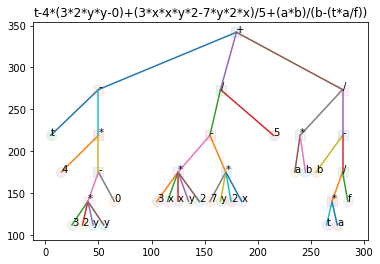

In [28]:
draw_graph_representation(complicated_derivative("t-4*$x,x$2+$y$1/5+(a*b)/(b-(t*a/f))", "3*x*x*y*y-7*y*y*x"))

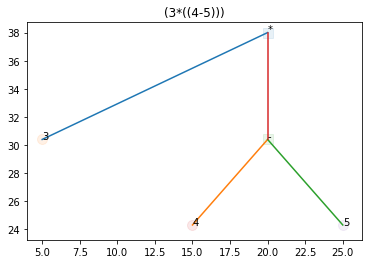

In [29]:
draw_graph_representation("(3*((4-5)))")